<a href="https://colab.research.google.com/github/Lawrence-Krukrubo/Text-Based-AI/blob/master/1_getting_started_nltk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
% cd "/content/drive/My Drive/Colab_Notebooks/data_tools/nltk"

/content/drive/My Drive/Colab_Notebooks/data_tools/nltk


1. [**NLTK-Book**](http://www.nltk.org/book/)
2. [more-on-Viterbi-algorithm](http://people.cs.georgetown.edu/nschneid/cosc572/f16/12_viterbi_slides.pdf)
3. [pos-tagging-using-HMM](http://www.phontron.com/slides/nlp-programming-en-04-hmm.pdf)
4. [pos-with-deep-learning](https://becominghuman.ai/part-of-speech-tagging-tutorial-with-the-keras-deep-learning-library-d7f93fa05537)

**It is easy to get our hands on millions of words of text. What can we do with it, assuming we can write some simple programs? Here, we'll address the following questions:**

1. What can we achieve by combining simple programming techniques with large quantities of text?
2. How can we automatically extract key words and phrases that sum up the style and content of a text?
3. What tools and techniques does the Python programming language provide for such work?
4. What are some of the interesting challenges of natural language processing?

<h2>1. Downloads and Imports</h2>

In [72]:
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter, defaultdict
import string
from nltk.corpus import stopwords

print(f'nltk version: {nltk.__version__}')

nltk version: 3.2.5


In [3]:
punctuations = string.punctuation

In [4]:
nltk.download()
from nltk.book import *

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> book
       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package brown to /root/nltk_data...
       |   Unzipping corpora/brown.zip.
       | Downloading package chat80 to /root/nltk_data...
       |   Unzipping corpora/chat80.zip.
       | Downloading package cmudict to /root/nltk_data...
       |   Unzipping corpora/cmudict.zip.
       | Downloading package conll2000 to /root/nltk_data...
       |   Unzipping corpora/conll2000.zip.
       | Downloading package conll2002 to /root/nltk_data...
       |   Unzipping corpora/conll2002.zip.
       | Downloading package dependency_treebank to /root/nltk_data...
   

<h2>2. Searching Text:</h2>

There are many ways to examine the context of a text apart from simply reading it. A concordance view shows us every occurrence of a given word, together with some context. Here we look up the word monstrous in Moby Dick.



In [5]:
text1

<Text: Moby Dick by Herman Melville 1851>

To add your own text to nltk and use nltk functions on it..<br>
You must create a Text instance from a sequence of strings. Use a Tokenizer from nltk.tokenize to tokenize your sentence:

In [6]:
sent = "China is an emerging FinTech hotbed thanks to its expanding middle class, rapid digitization and electronic payments adoption. But a new report from Citi found that, while China may be the market to watch for FinTech investments, the U.S. continues to thrive at the top of the B2B FinTech mountain.According to Digital Disruption — Revisited: What FinTech VC Investments Tells Us About A Changing Industry, Citi expects an influx in venture capital across the FinTech startup scape. But not all markets are created equal. China saw more than half of the world’s FinTech investments in the first nine months of 2016, the bank noted."

In [7]:
t = nltk.tokenize.WhitespaceTokenizer()  # or any other Tokenizer
c = Text(t.tokenize(sent))
c.concordance('FinTech')

Displaying 6 of 6 matches:
                                    FinTech hotbed thanks to its expanding midd
hina may be the market to watch for FinTech investments, the U.S. continues to 
ues to thrive at the top of the B2B FinTech mountain.According to Digital Disru
igital Disruption — Revisited: What FinTech VC Investments Tells Us About A Cha
nflux in venture capital across the FinTech startup scape. But not all markets 
a saw more than half of the world’s FinTech investments in the first nine month


In [8]:
text1.concordance('monstrous')

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


What other words appear in a similar range of contexts as monstrous? We can find out by appending the term similar to the name of the text in question, then inserting the relevant word in parentheses:

In [9]:
text1.similar('monstrous')

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless


In [10]:
text2.concordance('monstrous')

Displaying 11 of 11 matches:
. " Now , Palmer , you shall see a monstrous pretty girl ." He immediately went
your sister is to marry him . I am monstrous glad of it , for then I shall have
ou may tell your sister . She is a monstrous lucky girl to get him , upon my ho
k how you will like them . Lucy is monstrous pretty , and so good humoured and 
 Jennings , " I am sure I shall be monstrous glad of Miss Marianne ' s company 
 usual noisy cheerfulness , " I am monstrous glad to see you -- sorry I could n
t however , as it turns out , I am monstrous glad there was never any thing in 
so scornfully ! for they say he is monstrous fond of her , as well he may . I s
possible that she should ." " I am monstrous glad of it . Good gracious ! I hav
thing of the kind . So then he was monstrous happy , and talked on some time ab
e very genteel people . He makes a monstrous deal of money , and they keep thei


In [11]:
text2.similar('monstrous')

very so exceedingly heartily a as good great extremely remarkably
sweet vast amazingly


Observe that we get different results for different texts. Austen uses this word quite differently from Melville; for her, monstrous has positive connotations, and sometimes functions as an intensifier like the word very.

The term common_contexts allows us to examine just the contexts that are shared by two or more words, such as monstrous and very

In [12]:
text2.common_contexts(['monstrous','very'])

a_pretty am_glad a_lucky is_pretty be_glad


In [13]:
text1.common_contexts(['monstrous', 'perilous'])

most_and


we can also determine the location of a word in the text: how many words from the beginning it appears. This positional information can be displayed using a dispersion plot. Each stripe represents an instance of a word, and each row represents the entire text

Lexical Dispersion Plot for Words in U.S. Presidential Inaugural Addresses: This can be used to investigate changes in language use over time

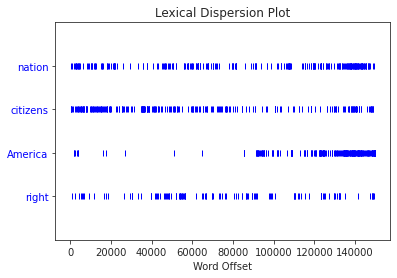

In [14]:
sns.set_style('ticks')
text4.dispersion_plot(['nation', 'citizens', 'America', 'right'])

<h2>3. Counting Vocabulary:</h2>

In this section we will see how to use the computer to count the words in a text in a variety of useful ways

In [15]:
len(text3)

44764

So Genesis has 44,764 words and punctuation symbols, or **`"tokens."`** A token is the technical name for a sequence of characters — such as hairy, his, or...<br>How many distinct words does the book of Genesis contain?  The vocabulary of a text is just the set of tokens that it uses, since in a set, all duplicates are collapsed together. We can find this with `set(text3)`

In [16]:
# confirming what type of documents we're dealing with
type(text1)

nltk.text.Text

In [17]:
def get_unique_tokens(text):
    """Find the unique tokens in a text

    @param text: an nltk.text.Text object
    @return: two items, first is the count,
            second is a list of unique items
    """
    unique_list = list(sorted(set(text)))
    return len(unique_list), unique_list

In [19]:
unique_text3 = get_unique_tokens(text3)
print(f'Genesis contains {unique_text3[0]} unique tokens\n')
unique_text3[1][:20]

Genesis contains 2789 unique tokens



['!',
 "'",
 '(',
 ')',
 ',',
 ',)',
 '.',
 '.)',
 ':',
 ';',
 ';)',
 '?',
 '?)',
 'A',
 'Abel',
 'Abelmizraim',
 'Abidah',
 'Abide',
 'Abimael',
 'Abimelech']

Although it has 44,764 tokens, this book has only 2,789 distinct words, vocabulary, or "word types." A word type is the form or spelling of the word independently of its specific occurrences in a text — that is, the word considered as a unique item of vocabulary. Our count of 2,789 items will include punctuation symbols, so we will generally call these unique items types instead of word types.

**lexical richness of the text:**<br>
The lexical richness of the text computes the ratio of unique words to the number of distinct words in the text.
Let's write a function to print the lexical richness for all texts here

In [20]:
# First get the titles
titles = ['text1: Moby Dick by Herman Melville 1851', \
          'text2: Sense and Sensibility by Jane Austen 1811', \
          'text3: The Book of Genesis', \
          'text4: Inaugural Address Corpus', \
          'text5: Chat Corpus', \
          'text6: Monty Python and the Holy Grail', \
          'text7: Wall Street Journal', \
          'text8: Personals Corpus', \
          'text9: The Man Who Was Thursday by G . K . Chesterton 1908']
texts = [text1, text2, text3, text4, text5, text6, text7, text8, text9]

In [21]:
def lexical_richness(texts=texts, titles=titles):
    dictt = {}
    for text, title in zip(texts, titles):
        key = title[:5]
        unique_tokens = get_unique_tokens(text)[0]
        total_tokens = len(text)
        richness = round((unique_tokens / total_tokens)*100, 2)
        dictt[key] = richness

    return dictt

In [22]:
lex_richness = lexical_richness()
print(lex_richness)

{'text1': 7.41, 'text2': 4.83, 'text3': 6.23, 'text4': 6.62, 'text5': 13.48, 'text6': 12.77, 'text7': 12.32, 'text8': 22.77, 'text9': 9.83}


Now to identify the text that has the highest lexical richness, simply use the max().

In [24]:
max(lex_richness, key=lex_richness.get)

'text8'

<h2>1. A Closer Look at Python: Texts as Lists of Words</h2>
<h2>2. Python Variables and Strings,  

In [25]:
text4[6]

'and'

In [26]:
text4.index('Senate')

5

* Remember that capitalized words appear before lowercase words in sorted lists

* Notice that our indexes start from zero: sent element zero, written sent[0]. The reason is simple: the moment Python accesses the content of a list from the computer's memory, it is already at the first element; we have to tell it how many elements forward to go. Thus, zero steps forward leaves it at the first element.

We can also replace an entire slice with new material

In [27]:
list_x = ['one', 'two', 'three', 'four', 'five', 'six']

# Now slice off a chunk of the list and assign smtn
list_x[2:] = ['ten']  # putting in a list keeps the element together

#show list
list_x

['one', 'two', 'ten']

<h2>3. Computing with Language: Simple Statistics</h2>

Now, we pick up the question of what makes a text distinct, and use automatic methods to find characteristic words and expressions of a text

In [28]:
saying = ['After', 'all', 'is', 'said', 'and', 'done','more', 'is', 'said', 'than', 'done']
# let' tokenize it
tokens = get_unique_tokens(saying)[1]
tokens[-2:]

['said', 'than']

<h3>3.1. Frequency Distributions</h3>

How can we automatically identify the words of a text that are most informative about the topic and genre of the text?

**Using The Counter Object**

In [29]:
# first remove punctuation and stop-words
text_list3 = [i for i in text3 if i not in string.punctuation and i not in stopwords.words('english')]

In [30]:
# Then use a counter object to count unique words
text_dict3 = Counter(text_list3)

In [31]:
# Count howmany unique words exist in text3 without punctuations and stop words.
len(text_list3)

20587

In [32]:
# find word with maximum frequency
max(text_dict3, key=text_dict3.get)

'And'

In [33]:
text_dict3['And']

1250

**Using NLTK freqdist**

Since we often need frequency distributions in language processing, NLTK provides built-in support for them. Let's use a FreqDist to find the 50 most frequent words of `Moby Dick`:<br>
Note: it's called frequency distribution cos it tells us the frequency of each vocabulary item in the text.

In [34]:
fdist1 = FreqDist(text1)
print(fdist1)

<FreqDist with 19317 samples and 260819 outcomes>


In [35]:
# Let's print the 50 most common words of text1
fdist1.most_common(50)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632),
 ('as', 1620),
 ('"', 1478),
 ('all', 1462),
 ('for', 1414),
 ('this', 1280),
 ('!', 1269),
 ('at', 1231),
 ('by', 1137),
 ('but', 1113),
 ('not', 1103),
 ('--', 1070),
 ('him', 1058),
 ('from', 1052),
 ('be', 1030),
 ('on', 1005),
 ('so', 918),
 ('whale', 906),
 ('one', 889),
 ('you', 841),
 ('had', 767),
 ('have', 760),
 ('there', 715),
 ('But', 705),
 ('or', 697),
 ('were', 680),
 ('now', 646),
 ('which', 640),
 ('?', 637),
 ('me', 627),
 ('like', 624)]

Only one word, whale, is slightly informative! It occurs over 906 times. The rest of the words tell us nothing about the text; they're just English `"plumbing."` What proportion of the text is taken up with such words? We can generate a cumulative frequency plot for these words

When we first invoke FreqDist, we pass the name of the text as an argument. We can inspect the total number of words (**"outcomes"**) that have been counted up— 260,819 in the case of Moby Dick.

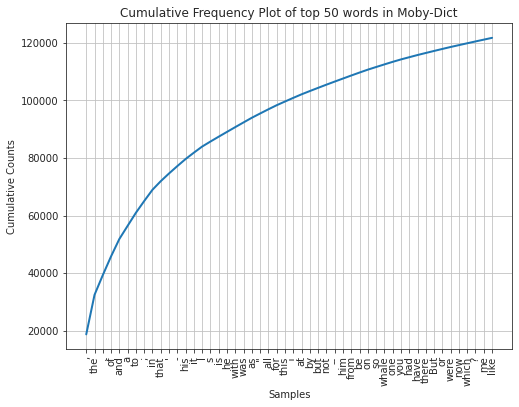

In [36]:
plt.figure(figsize=(8,6))
plt.title('Cumulative Frequency Plot of top 50 words in Moby-Dict')
fdist1.plot(50, cumulative=True)

Wow! These 50 words account for nearly half the book!

If the frequent words don't help us, how about the words that occur once only, the so-called **`hapaxes`**?

In [37]:
fdist1.hapaxes()

['Herman',
 'Melville',
 ']',
 'ETYMOLOGY',
 'Late',
 'Consumptive',
 'School',
 'threadbare',
 'lexicons',
 'mockingly',
 'flags',
 'mortality',
 'signification',
 'HACKLUYT',
 'Sw',
 'HVAL',
 'roundness',
 'Dut',
 'Ger',
 'WALLEN',
 'WALW',
 'IAN',
 'RICHARDSON',
 'KETOS',
 'GREEK',
 'CETUS',
 'LATIN',
 'WHOEL',
 'ANGLO',
 'SAXON',
 'WAL',
 'HWAL',
 'SWEDISH',
 'ICELANDIC',
 'BALEINE',
 'BALLENA',
 'FEGEE',
 'ERROMANGOAN',
 'Librarian',
 'painstaking',
 'burrower',
 'grub',
 'Vaticans',
 'stalls',
 'higgledy',
 'piggledy',
 'gospel',
 'promiscuously',
 'commentator',
 'belongest',
 'sallow',
 'Pale',
 'Sherry',
 'loves',
 'bluntly',
 'Subs',
 'thankless',
 'Hampton',
 'Court',
 'hie',
 'refugees',
 'pampered',
 'Michael',
 'Raphael',
 'unsplinterable',
 'GENESIS',
 'JOB',
 'JONAH',
 'punish',
 'ISAIAH',
 'soever',
 'cometh',
 'incontinently',
 'perisheth',
 'PLUTARCH',
 'MORALS',
 'breedeth',
 'Whirlpooles',
 'Balaene',
 'arpens',
 'PLINY',
 'Scarcely',
 'TOOKE',
 'LUCIAN',
 'TRUE',


It seems that there are too many rare words, and without seeing the context we probably can't guess what half of the hapaxes mean in any case! Since neither frequent nor infrequent words help, we need to try something else.

We can see that fdist1 contains some stop-words as we did not exactly clean text1. let's try it on the cleaned text3

In [38]:
fdist3 = FreqDist(text_list3)
fdist3.most_common(10)

[('And', 1250),
 ('unto', 590),
 ('I', 484),
 ('said', 476),
 ('thou', 272),
 ('thy', 267),
 ('thee', 257),
 ('shall', 253),
 ('God', 231),
 ('father', 198)]

In [39]:
fdist3.hapaxes()

['form',
 'void',
 'Day',
 'Night',
 'firmame',
 'Heaven',
 'appe',
 'Earth',
 'signs',
 'seasons',
 'lesser',
 'nig',
 'darkne',
 'fly',
 'whales',
 'winged',
 'seas',
 'likene',
 'subdue',
 'finished',
 'sanctified',
 'plant',
 'gr',
 'mist',
 'breathed',
 'parted',
 'Pison',
 'bdellium',
 'onyx',
 'Gihon',
 'Ethiopia',
 'Hiddekel',
 'Assyria',
 'Euphrates',
 'freely',
 'eatest',
 'sle',
 'ribs',
 'rib',
 'Woman',
 'Man',
 'cleave',
 'ashamed',
 'subtil',
 'gard',
 'knowing',
 'desired',
 'sewed',
 'fig',
 'leaves',
 'aprons',
 'walking',
 'cool',
 'whereof',
 'gavest',
 'belly',
 'enmity',
 'conception',
 'Thorns',
 'thistles',
 'sweat',
 'tak',
 'coats',
 'clothed',
 'Cherubims',
 'flaming',
 'tiller',
 'firstlings',
 'fallen',
 'crieth',
 'tillest',
 'henceforth',
 'punishment',
 'driven',
 'findeth',
 'whosoever',
 'slayeth',
 'vengeance',
 'mark',
 'finding',
 'Nod',
 'Methusa',
 'Methusael',
 'Jabal',
 'Jubal',
 'handle',
 'organ',
 'instructor',
 'artificer',
 'brass',
 'ir',


**3.2 Fine-grained Selection of Words:**

Next, let's look at the long words of a text; perhaps these will be more characteristic and informative. We would like to find the words from the vocabulary of the text that are more than 15 characters long

In [40]:
# First let's get only unique tokens in list1
v = get_unique_tokens(text1)[1]

# Next we grab a list of these unique items if each item is > 15 Chars
long_words = [token for token in v if len(token) > 15]

Let's see the sorted long words

In [41]:
sorted(long_words)

['CIRCUMNAVIGATION',
 'Physiognomically',
 'apprehensiveness',
 'cannibalistically',
 'characteristically',
 'circumnavigating',
 'circumnavigation',
 'circumnavigations',
 'comprehensiveness',
 'hermaphroditical',
 'indiscriminately',
 'indispensableness',
 'irresistibleness',
 'physiognomically',
 'preternaturalness',
 'responsibilities',
 'simultaneousness',
 'subterraneousness',
 'supernaturalness',
 'superstitiousness',
 'uncomfortableness',
 'uncompromisedness',
 'undiscriminating',
 'uninterpenetratingly']

Let's see long words for text5, the chat-corpus document

In [42]:
# First let's get only unique tokens in list1
v = get_unique_tokens(text5)[1]

# Next we grab a list of these unique items if each item is > 15 Chars
long_words = [token for token in v if len(token) > 15]

sorted(long_words)

['!!!!!!!!!!!!!!!!',
 '!!!!!!!!!!!!!!!!!!!!!!',
 '!!!!!!!!!!!!!!!!!!!!!!!',
 '!!!!!!!!!!!!!!!!!!!!!!!!!!!',
 '!!!!!!!!!!!!!!!!!!!!!!!!!!!!',
 '!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!',
 '#talkcity_adults',
 '(((((((((((((((((',
 '((((((((((((((((((',
 '((((((((((((((((((((',
 '(((((((((((((((((((((',
 '(((((((((((((((((((((((',
 '((((((((((((((((((((((((',
 '(((((((((((((((((((((((((',
 '((((((((((((((((((((((((((',
 ')))))))))))))))))',
 ')))))))))))))))))))',
 ')))))))))))))))))))))',
 '))))))))))))))))))))))',
 '))))))))))))))))))))))))))))',
 ')))))))))))))))))))))))))))))))',
 '--------------------',
 '.(..(.vMp3 v1.7.4.).)',
 '.(..(.vMp3 vi.p.t.)..).',
 '................',
 '..................',
 '...................',
 '....................',
 '........................',
 '..............................',
 '.A.n.a.c.?.n.?.a.',
 '//www.wunderground.com/cgi-bin/findweather/getForecast?query=95953#FIR',
 '<3333333333333333',
 '<33333333333333333',
 'BAAAAALLLLLLLLIII

Let's return to our task of finding words that characterize a text. Notice that the long words in text4 reflect its national focus — constitutionally, transcontinental — whereas those in text5 reflect its informal content: boooooooooooglyyyyyy and yuuuuuuuuuuuummmmmmmmmmmm. Have we succeeded in automatically extracting words that typify a text? Well, these very long words are often hapaxes (i.e., unique) and perhaps it would be better to find frequently occurring long words. This seems promising since it eliminates frequent short words (e.g., the) and infrequent long words (e.g. antiphilosophists). Here are all words from the chat corpus that are longer than seven characters, that occur more than seven times:

In [43]:
v = get_unique_tokens(text5)[1]

long_words_text5_above_seven_times = [token for token in v if len(token) > 7 and text5.count(token) > 7]
long_words_text5_above_seven_times

['#14-19teens',
 '#talkcity_adults',
 '((((((((((',
 '........',
 'Question',
 'actually',
 'anything',
 'computer',
 'cute.-ass',
 'everyone',
 'football',
 'innocent',
 'listening',
 'remember',
 'seriously',
 'something',
 'together',
 'tomorrow',
 'watching']

Notice how we have used two conditions: len(token) > 7 ensures that the words are longer than seven letters, and text5.count(token) > 7 ensures that these words occur more than seven times. At last we have managed to automatically identify the frequently-occurring content-bearing words of the text.

In [44]:
text5.count('the')

646

**3.3   Collocations and Bigrams:**

A collocation is a sequence of words that occur together unusually often. Thus `red wine` is a collocation, whereas the wine is not. A characteristic of collocations is that they are resistant to substitution with words that have similar senses; for example, maroon wine sounds definitely odd.

To get a handle on collocations, we start off by extracting from a text a list of word pairs, also known as `bigrams`. This is easily accomplished with the function bigrams():

In [45]:
list(bigrams(['after', 'all', 'is', 'said', 'and', 'done', 'more', 'is', 'said', 'than', 'done']))

[('after', 'all'),
 ('all', 'is'),
 ('is', 'said'),
 ('said', 'and'),
 ('and', 'done'),
 ('done', 'more'),
 ('more', 'is'),
 ('is', 'said'),
 ('said', 'than'),
 ('than', 'done')]

Now, collocations are essentially just frequent bigrams, except that we want to pay more attention to the cases that involve rare words. In particular, we want to find bigrams that occur more often than we would expect based on the frequency of the individual words. The collocations() function does this for us

In [47]:
text4.collocations()

United States; fellow citizens; four years; years ago; Federal
Government; General Government; American people; Vice President; God
bless; Chief Justice; Old World; Almighty God; Fellow citizens; Chief
Magistrate; every citizen; one another; fellow Americans; Indian
tribes; public debt; foreign nations


In [48]:
text8.collocations()

would like; medium build; social drinker; quiet nights; non smoker;
long term; age open; Would like; easy going; financially secure; fun
times; similar interests; Age open; weekends away; poss rship; well
presented; never married; single mum; permanent relationship; slim
build


**3.4   Counting Other Things:**

Counting words is useful, but we can count other things too. For example, we can look at the distribution of word lengths in a text, by creating a FreqDist out of a long list of numbers, where each number is the length of the corresponding word in the text:

In [49]:
fdist = FreqDist(len(w) for w in text1)
print(fdist)

<FreqDist with 19 samples and 260819 outcomes>


In [50]:
fdist

FreqDist({1: 47933,
          2: 38513,
          3: 50223,
          4: 42345,
          5: 26597,
          6: 17111,
          7: 14399,
          8: 9966,
          9: 6428,
          10: 3528,
          11: 1873,
          12: 1053,
          13: 567,
          14: 177,
          15: 70,
          16: 22,
          17: 12,
          18: 1,
          20: 1})

One might wonder how frequent the different lengths of word are (e.g., how many words of length four appear in the text, are there more words of length five than length four, etc). We can do this as follows:

In [52]:
fdist.most_common(5)

[(3, 50223), (1, 47933), (4, 42345), (2, 38513), (5, 26597)]

In [55]:
fdist.max()

3

In [56]:
fdist[3]

50223

In [57]:
type(fdist)

nltk.probability.FreqDist

From this we see that the most frequent word length is 3, and that words of length 3 account for roughly 50,000 (or 20%) of the words making up the book. Although we will not pursue it here, further analysis of word length might help us understand differences between authors, genres, or languages.

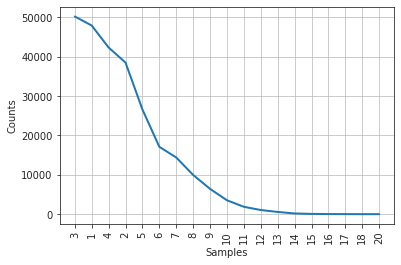

In [58]:
fdist.plot()

<h3>Example	Description of FreqDist</h3>

* `fdist = FreqDist(samples)`	create a frequency distribution containing the given samples
* `fdist[sample] += 1`	increment the count for this sample
* `fdist['monstrous']`	count of the number of times a given sample occurred
* `fdist.freq('monstrous')`	a given sample count divided by all total counts
* `fdist.N()`	total number of samples
* `fdist.most_common(n)`	the n most common samples and their frequencies
* `for sample in fdist:`	iterate over the samples
* `fdist.max()`	sample with the greatest count
* `fdist.tabulate()`	tabulate the frequency distribution
* `fdist.plot()`	graphical plot of the frequency distribution
* `fdist.plot(cumulative=True)`	cumulative plot of the frequency distribution
* `fdist1 |= fdist2`	update fdist1 with counts from fdist2
* `fdist1 < fdist2`	test if samples in fdist1 occur less frequently than in fdist2

In [61]:
fdist[3]

50223

In [60]:
fdist.freq(3)

0.19255882431878046

In [62]:
fdist.N()

260819

In [63]:
# Dividing the count or value of fdist[3] by the total number of samples.
50223 / 260819

0.19255882431878046

**Some Word Comparison Operators:**

**Function	Meaning**

* `s.startswith(t)`	test if s starts with t
* `s.endswith(t)`	test if s ends with t
* `t in s`	test if t is a substring of s
* `s.islower()`	test if s contains cased characters and all are lowercase
* `s.isupper()`	test if s contains cased characters and all are uppercase
* `s.isalpha()`	test if s is non-empty and all characters in s are alphabetic
* `s.isalnum()`	test if s is non-empty and all characters in s are alphanumeric
* `s.isdigit()`	test if s is non-empty and all characters in s are digits
* `s.istitle()`	test if s contains cased characters and is titlecased (i.e. all words in s have initial capitals)

In [64]:
print(help('str.isalnum'))

Help on method_descriptor in str:

str.isalnum = isalnum(...)
    S.isalnum() -> bool
    
    Return True if all characters in S are alphanumeric
    and there is at least one character in S, False otherwise.

None


In [65]:
# Select only words that end with 'ableness' from text1

sorted(w for w in set(text1) if w.endswith('ableness'))

['comfortableness',
 'honourableness',
 'immutableness',
 'indispensableness',
 'indomitableness',
 'intolerableness',
 'palpableness',
 'reasonableness',
 'uncomfortableness']

In [66]:
# Select only words with a title first letter and length above 10 from text3

sorted(wd for wd in set(text3) if wd.istitle() and len(wd) > 10)

['Abelmizraim',
 'Allonbachuth',
 'Beerlahairoi',
 'Canaanitish',
 'Chedorlaomer',
 'Girgashites',
 'Hazarmaveth',
 'Hazezontamar',
 'Ishmeelites',
 'Jegarsahadutha',
 'Jehovahjireh',
 'Kirjatharba',
 'Melchizedek',
 'Mesopotamia',
 'Peradventure',
 'Philistines',
 'Zaphnathpaaneah']

**4.2   Operating on Every Element**

Let's return to the question of vocabulary size, and apply the same idiom here:

In [67]:
len(text1)

260819

In [68]:
len(set(text1))

19317

In [69]:
len(set(word.lower() for word in text1))

17231

Now that we are not double-counting words like This and this, which differ only in capitalization, we've wiped 2,000 off the vocabulary count! We can go a step further and eliminate numbers and punctuation from the vocabulary count by filtering out any non-alphabetic items:

In [70]:
len(set(word.lower() for word in text1 if not word.isdigit() and not word in punctuations))

17037

<h3>5   Automatic Natural Language Understanding</h3>

* An **antecedent** is a part of a sentence that is later replaced by a pronoun.
An example of an antecedent is the word `“John”` in the sentence: “John loves his dog.”
* A **pronoun** is a word that takes the place of a noun. In the sentence Joe saw Jill, and he waved at her, the pronouns `he` and `her` take the place of Joe and Jill, respectively.<br>Other examples of pronouns are `(I, me, he, she, herself, you, it, that, they, each, few, many, who, whoever, whose, someone, everybody, etc.)`

**5.1   Word Sense Disambiguation**

In word sense disambiguation we want to work out which sense of a word was intended in a given context. Consider the ambiguous words serve and dish:
	
a.		serve: help with food or drink; hold an office; put ball into play

b.		dish: plate; course of a meal; communications device


Understand the meaning of the word `by` in the sentences below:-

a.		The lost children were found by the searchers **(agentive)**

b.		The lost children were found by the mountain **(locative)**

c.		The lost children were found by the afternoon **(temporal)**



**5.2   Pronoun Resolution**

A deeper kind of language understanding is to work out "who did what to whom" — i.e., to detect the subjects and objects of verbs. You learnt to do this in elementary school, but it's harder than you might think. In the sentence the thieves stole the paintings it is easy to tell who performed the stealing action. Consider three possible following sentences in and try to determine what was sold, caught, and found (one case is ambiguous).

	
a.		The thieves stole the paintings. They were subsequently sold.  (_paintings were sold_)

b.		The thieves stole the paintings. They were subsequently caught.  (_thieves were caught_)

c.		The thieves stole the paintings. They were subsequently found.  (_paintings were found_)



Answering this question involves finding the antecedent of the pronoun they, either thieves or paintings. Computational techniques for tackling this problem include **anaphora resolution** — identifying what a pronoun or noun phrase refers to — and **semantic role labeling** — identifying how a noun phrase relates to the verb (as agent, patient, instrument, and so on).

**See how machine translation works** use this sentence:- {Machine translation is difficult because a given word could have several possible translations} in this **[link](https://www.translationparty.com/machine-translation-is-difficult-because-a-given-word-could-have-11448589)**

Machine translation is difficult because a given word could have several possible translations (depending on its meaning), and because word order must be changed in keeping with the grammatical structure of the target language. Today these difficulties are being faced by collecting massive quantities of parallel texts from news and government websites that publish documents in two or more languages. Given a document in German and English, and possibly a bilingual dictionary, we can automatically pair up the sentences, a process called `text alignment`. Once we have a million or more sentence pairs, we can detect corresponding words and phrases, and build a model that can be used for translating new text.

<img src="http://www.nltk.org/images/dialogue.png" width=800 height=400>

(_Simple Pipeline Architecture for a Spoken Dialogue System: Spoken input (top left) is analyzed, words are recognized, sentences are parsed and interpreted in context, application-specific actions take place (top right); a response is planned, realized as a syntactic structure, then to suitably inflected words, and finally to spoken output; different types of linguistic knowledge inform each stage of the process._)

For an example of a primitive dialogue system, try having a conversation with an NLTK chatbot. To see the available chatbots, run nltk.chat.chatbots()

**5.6   Textual Entailment**

The challenge of language understanding has been brought into focus in recent years by a public "shared task" called `Recognizing Textual Entailment (RTE)`. The basic scenario is simple... 

Suppose you want to find evidence to support the hypothesis: Sandra Goudie was defeated by Max Purnell, and that you have another short text that seems to be relevant, for example, Sandra Goudie was first elected to Parliament in the 2002 elections, narrowly winning the seat of Coromandel by defeating Labour candidate Max Purnell and pushing incumbent Green MP Jeanette Fitzsimons into third place. Does the text provide enough evidence for you to accept the hypothesis? In this particular case, the answer will be "No." You can draw this conclusion easily, but it is very hard to come up with automated methods for making the right decision. The RTE Challenges provide data that allow competitors to develop their systems, but not enough data for "brute force" machine learning techniques.

In [76]:
# nltk.chat.chatbots()

**5.7   Limitations of NLP**

Despite the research-led advances in tasks like RTE `(Recognizing Textual Entailment)`, natural language systems that have been deployed for real-world applications still cannot perform common-sense reasoning or draw on world knowledge in a general and robust manner. We can wait for these difficult artificial intelligence problems to be solved, but in the meantime it is necessary to live with some severe limitations on the reasoning and knowledge capabilities of natural language systems... 

Accordingly, right from the beginning, an important goal of NLP research has been to make progress on the difficult task of building technologies that "understand language," using superficial yet powerful techniques instead of unrestricted knowledge and reasoning capabilities. Indeed, this is one of the goals of this book, and we hope to equip you with the knowledge and skills to build useful NLP systems, and to contribute to the long-term aspiration of building intelligent machines.

**6   Summary**

* Texts are represented in Python using lists: `['Monty', 'Python']`. We can use indexing, slicing, and the len() function on lists.
* A word "token" is a particular appearance of a given word in a text; a word "type" is the unique form of the word as a particular sequence of letters. We count word tokens using `len(text)` and word types using `len(set(text))`.
* We obtain the vocabulary of a text $t$ using sorted(set($t$)).
We operate on each item of a text using `[f(x) for x in text]`.
* To derive the vocabulary, collapsing case distinctions and ignoring punctuation, we can write `set(w.lower() for w in text if w.isalpha())`.
* We process each word in a text using a for statement, such as `for w in t:` or `for word in text:`. This must be followed by the colon character and an indented block of code, to be executed each time through the loop.
* We test a condition using an if statement: `if len(word) < 5:`. This must be followed by the colon character and an indented block of code, to be executed only if the condition is true.
* A frequency distribution is a collection of items along with their frequency counts (e.g., the words of a text and their frequency of appearance).
* A function is a block of code that has been assigned a name and can be reused. Functions are defined using the def keyword, as in `def mult(x, y)`; `x` and `y` are parameters of the function, and act as placeholders for actual data values.
* A function is called by specifying its name followed by zero or more arguments inside parentheses, like this: `texts()`, `mult(3, 4)`, `len(text1)`.